<img src="https://github.com/urcuqui/Data-Science/blob/master/Utilities/scipy.png?raw=true" height="150" width="250">

__Author: Christian Camilo Urcuqui López__

__Date: 1 February 2019__



SciPy is a package to make scientific operations which uses NumPy objects like ndarray or matrices. Some possilities to make are integration and determining a function's maxima or minima; let's start with optimization and data fitting, and then move through interpolation, integation, spatial analysis, clustering, signal and image processing, space matrices, and statistics. 

+ [Optimization](#Optimization)
+ [Interpolation](#Interpolation)

In [1]:
import scipy 
scipy.__version__

'1.2.1'

In [3]:
# other libraries that are going to use 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Optimization 

The opmization package of SciPy allows us to solve minimization problems easily and quickly, one of these examples are related with linear regression, finding a function's minimum and maximum values, determining the root of a function, and finding where two functions intersect. 

_The opmitization and minimization tools that NumPy and SciPy don't have Markov Chain Monte Carlo (MCMC) capabilities, we can find this in other packages like PyMC._

### Data Modeling and Fitting

There are several ways to fit data with linear regression, one of them is by the method **curve_fit**, which is a $X^{2}$ method.

In [2]:
"""
In the next example we are going to make data from a known function with noise, 
and then fit the noisy data with curve_fit. We will model in the example is a simple linear
equation, f(x) = ax + b
"""
import numpy as np
import scipy 

# Creating a function to model and create data
def func(x, a, b):
    return a * x + b

# Generating clean data
x = np.linspace(0 ,  10, 100) # Return evenly spaced numbers over a specified interval.
y = func(x, 1, 2) # the result of our function

# let's print it the function f(x)
import matplotlib.pyplot as plt
plt.plot(x,y)

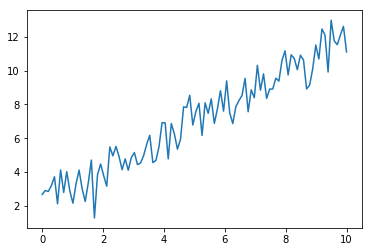

In [3]:
# adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))
plt.plot(x, yn)

In [6]:
# Executing curve_fit on noisy data
# curve_fit -> Use non-linear least squares to fit a function
popt, pcov = curve_fit(func, x, yn)
# popt returns the best fit values for parameters of the given model
# (func)

In [7]:
popt

array([0.96753347, 2.2042968 ])

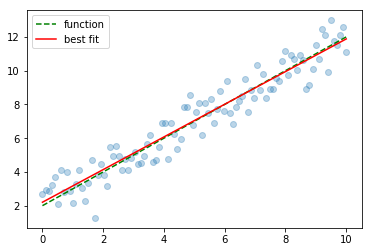

In [14]:
# let's plot the three figures
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, yn, alpha=0.3)
ax.plot(x, y, c="green", label="function", linestyle="dashed")
ax.plot(x, func(x, popt[0], popt[1]), label="best fit", c="r")
ax.legend(loc="upper left")

The values from **popt**, if a good fit, should be close to the values for the __y__ assigment. We can evaluate the quality of the fit with **pcov**,  where the diagonal elements are the variances for each parameter. 

We can do a least-squares fit to Gaussian profile, a **non-linear function**:

<center> $ \alpha * exp(\frac{-(x-\mu)^2}{2\sigma ^2})$ </center>
Where $\alpha$ is a scalar, $\mu$ is the mean, and $\sigma$ is the standar deviation

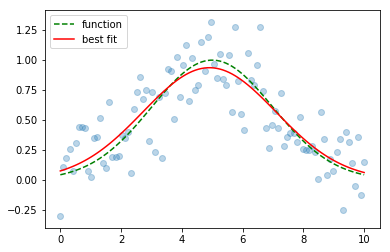

In [26]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a * np.exp((-(x-b)**2) / (2*c**2))

# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, yn, alpha=0.3)
ax.plot(x, y, c="green", label="function", linestyle="dashed")
ax.plot(x, func(x, popt[0], popt[1], popt[2]), label="best fit", c="r")
ax.legend(loc="upper left")

We can fit a one-dimensional dataet with multiple Gaussian profiles. Now, our next function are going to have two Gaussian equations with different input variables

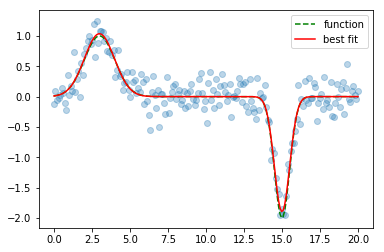

In [30]:
# Two-Gaussian model
def func(x, a0, b0, c0, a1, b1, c1):
    return (a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2))) + (a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2)))

# Generating clean data
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)

# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

# We can provide guesses for the fitting which will lead to better results
guesses = [1, 3, 1, 1, 15, 1]

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn, p0=guesses)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, yn, alpha=0.3)
ax.plot(x, y, c="green", label="function", linestyle="dashed")
ax.plot(x, func(x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]), label="best fit", c="r")
ax.legend(loc="upper right")

### Solutions to Functions

SciPy provides a set of tools in its **optimize** module to answer questions like these:
 + What is the root a function?
 + Where do two functions intersect?
 
 Let's answer the first question with the method **scipy.optimize.fsolve**.

In [29]:
from scipy.optimize import fsolve
import numpy as np

line = lambda x: x + 3

solution = fsolve(line, -2) # Find the roots of a function.
print (solution)

[-3.]


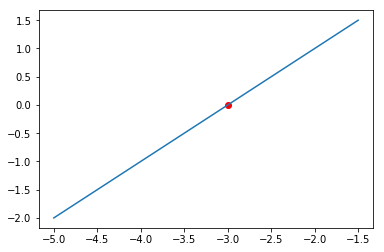

In [25]:
# let's make a sample
x = np.linspace(-5, -1.5, 6)
y = line(x)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
ax.scatter(solution, line(solution), c="r")

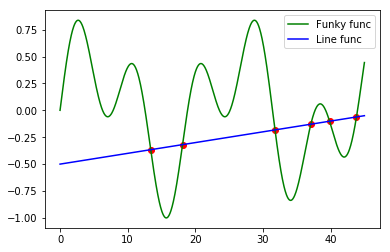

In [41]:
# finding the inserction between two quations 
from scipy.optimize import fsolve
import numpy as np

# defining function to simply intersection solution
def findIntersection(func1, func2, x0):
    return fsolve(lambda x: func1(x) - func2(x), x0)

# Defining functions that will intersect
funky =  lambda x: np.cos(x / 5) * np.sin(x / 2)
line = lambda x: 0.01 * x - 0.5

# Defining range and getting solutions on intersection points
x  = np.linspace(0, 45, 1000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])

# Printing out results for x and y
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, funky(x), c="green", label="Funky func")
ax.plot(x, line(x), c="blue", label="Line func")
ax.scatter(result, funky(result), c="r")
ax.legend(loc="upper right")

## Interpolation

Data that contains information usually has a functional form, and as analysts we want to model it. SciPy allows us to do interpolation, which integrates function for simple univariate cases and multivariate ones. 

Univariate interpolation is used when we have only when our data is led by one independent variable, whereas multivariate interpolation assumes there is more than one independent variable. 

We have two methods of interpolation:

+ Fit one function to an entire dataset 
+ Knows as a spline interpolation this function allows us to fit different parts of the dataset

Let's see some examples since how to interpoloate a simple function, an then proceed to a more complex cases. 

In [46]:
# the first parameter is a "linear" fit and the second is a "quadratic" fit.
import numpy as np
from scipy.interpolate import interp1d

# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)

print(x)
print(y)

[ 0.          1.65346982  3.30693964  4.96040945  6.61387927  8.26734909
  9.92081891 11.57428872 13.22775854 14.88122836 16.53469818 18.18816799
 19.84163781 21.49510763 23.14857745 24.80204727 26.45551708 28.1089869
 29.76245672 31.41592654]
[ 1.         -0.08257935 -0.9863613   0.24548549  0.94581724 -0.40169542
 -0.87947375  0.54694816  0.78914051 -0.67728157 -0.67728157  0.78914051
  0.54694816 -0.87947375 -0.40169542  0.94581724  0.24548549 -0.9863613
 -0.08257935  1.        ]


In [48]:
# Interpolating data
fl = interp1d(x, y, kind="linear")
fq = interp1d(x, y, kind="quadratic")

""" x.min and x.max are used to make sure we do not
 go beyond the boundaries of the data for the interpolation
""" 
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
tintq = fq(xint)